In [52]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import random_statevector, Statevector

# Use Aer's qasm_simulator
simulator = QasmSimulator()

In [82]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(3)

In [83]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
# Map the quantum measurement to the classical bits
#circuit.measure(2, 0)

In [84]:
#create a random input state vector for the first qubit
#vec0 = random_statevector(2)
#print('before circuit: {}'.format(vec0))
#circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 1)

#here's a different way to start a state vector
state = Statevector.from_int(0, 2**3)

#evolve the state with the circuit
state = state.evolve(circuit)
state.draw('qsphere')

<IPython.core.display.Latex object>

In [70]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

In [71]:
# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'0': 472, '1': 528}


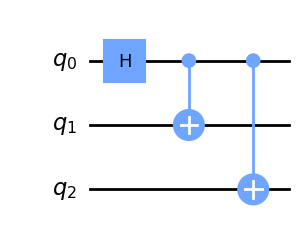

In [81]:
# Draw the circuit
circuit.draw('mpl')

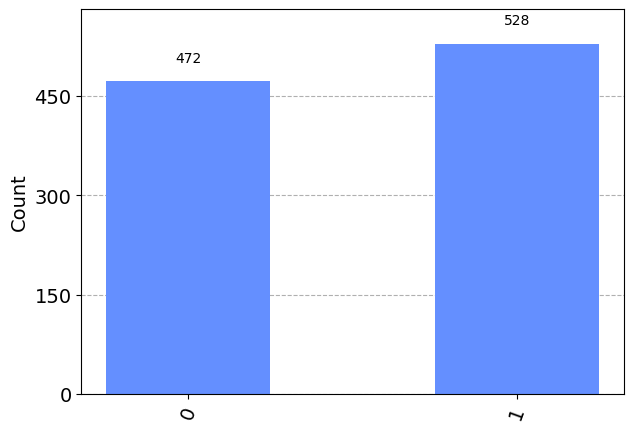

In [73]:
# Plot a histogram
plot_histogram(counts)